<a href="https://colab.research.google.com/github/FF132FF/methods-and-algorithms-of-digital-image-processing/blob/main/Practical_work_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание №1. Напишите функцию, которая принимает на вход строку с ссылкой на изображение из сети Интернет и возвращает открытое изображение в OpenCV

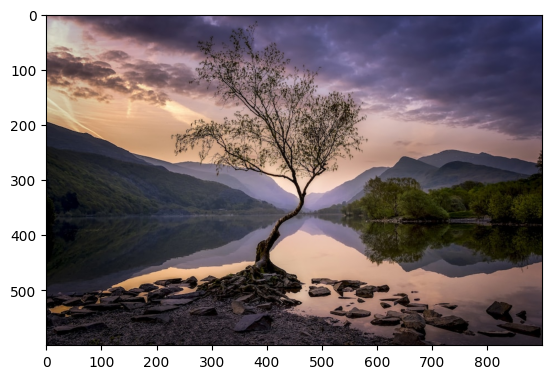

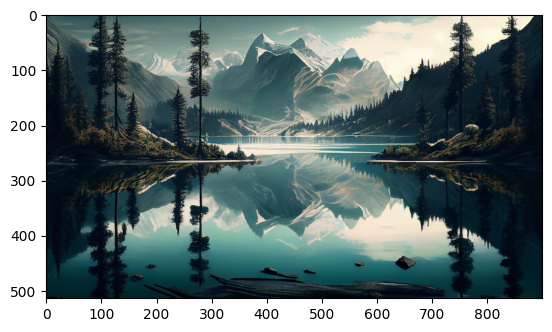

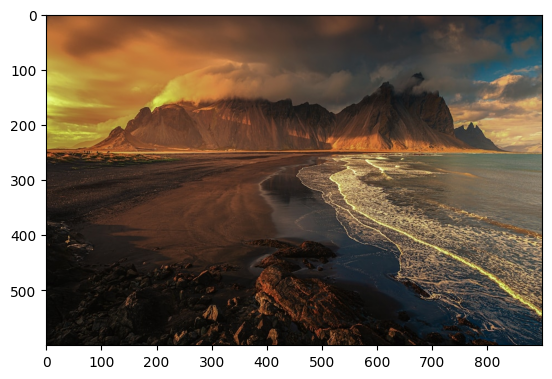

In [12]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

def getImage(imageLink):
  respons = requests.get(imageLink, stream=True).raw
  image = np.asarray(bytearray(respons.read()), dtype="uint8")
  image = cv.imdecode(image, cv.IMREAD_COLOR)
  plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()

getImage("https://img.freepik.com/free-photo/lone-tree_181624-46361.jpg?w=900&t=st=1702330232~exp=1702330832~hmac=22af416479ab5960aeb347094a93f2f08a29cb7d66df5a225a48d7c366e05d7b")
getImage("https://img.freepik.com/free-photo/a-painting-of-a-mountain-lake-with-a-mountain-in-the-background_188544-9126.jpg?w=900&t=st=1702330325~exp=1702330925~hmac=0209473d3fd15d413de9f03b2a5ef37f34188155216055316264918516e096ce")
getImage("https://img.freepik.com/free-photo/aerial-beautiful-shot-of-a-seashore-with-hills-on-the-background-at-sunset_181624-24143.jpg?w=900&t=st=1702330377~exp=1702330977~hmac=3f6a31ce9faf72fba3bea071cef75370d7be138ef4ab2e717c1742b47c39b2a7")

## Задание №2. Напишите функцию, которая принимает на вход изображение в палитре BGR и возвращает копию этого изображения с выравненной гистограммой (методом equalizeHist())


---------------------------------

Mean:    127.92621728395062
Minimum: 0
Maximum: 255



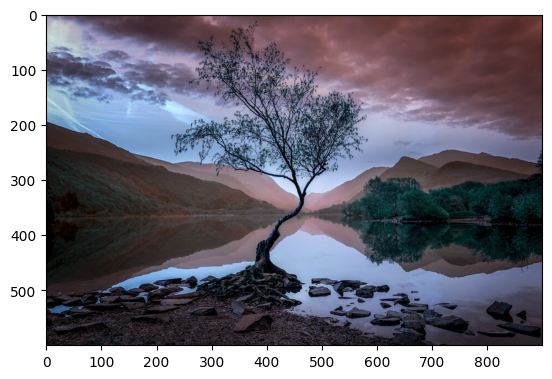

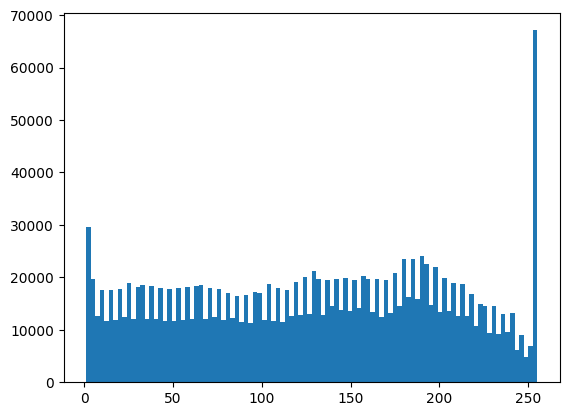


---------------------------------

Mean:    127.56746144977663
Minimum: 0
Maximum: 255



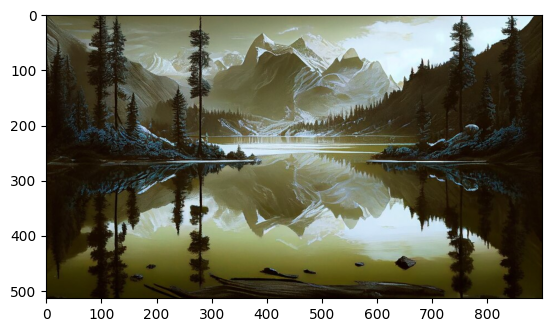

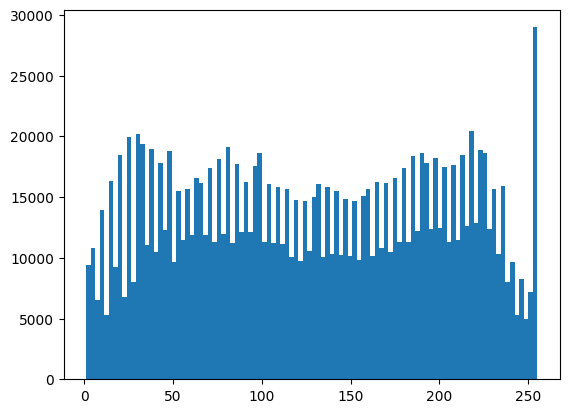


---------------------------------

Mean:    123.99696172839506
Minimum: 0
Maximum: 255



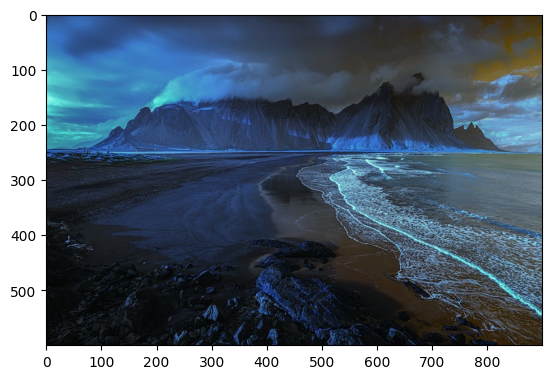

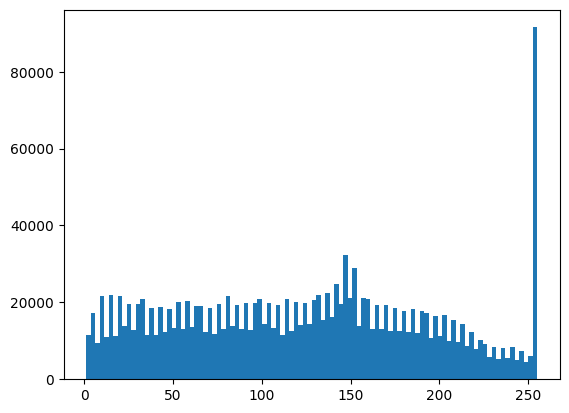

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

def img2hist(image, label = True):
  histogram = np.copy(image)
  ax = plt.subplots()
  if label != None:
    print('\n---------------------------------\n')
    print(f'Mean:    {histogram.mean()}')
    print(f'Minimum: {histogram.min()}')
    print(f'Maximum: {histogram.max()}\n')

  histogram = histogram[histogram != 0]
  return plt.hist(histogram.flatten(), bins=100)

def getImageWithHist(imageLink):
  respons = requests.get(imageLink, stream=True).raw
  image = np.asarray(bytearray(respons.read()), dtype="uint8")
  image = cv.imdecode(image, cv.IMREAD_COLOR)
  plt.imshow(image)

  imageCopy = image.copy()
  ycrcbImage = cv.cvtColor(imageCopy, cv.COLOR_BGR2YCrCb)
  ycrcbImage[:, :, 0] = cv.equalizeHist(ycrcbImage[:, :, 0])
  equalizedImage = cv.cvtColor(ycrcbImage, cv.COLOR_YCrCb2BGR)
  plt.show(img2hist(equalizedImage))

getImageWithHist("https://img.freepik.com/free-photo/lone-tree_181624-46361.jpg?w=900&t=st=1702330232~exp=1702330832~hmac=22af416479ab5960aeb347094a93f2f08a29cb7d66df5a225a48d7c366e05d7b")
getImageWithHist("https://img.freepik.com/free-photo/a-painting-of-a-mountain-lake-with-a-mountain-in-the-background_188544-9126.jpg?w=900&t=st=1702330325~exp=1702330925~hmac=0209473d3fd15d413de9f03b2a5ef37f34188155216055316264918516e096ce")
getImageWithHist("https://img.freepik.com/free-photo/aerial-beautiful-shot-of-a-seashore-with-hills-on-the-background-at-sunset_181624-24143.jpg?w=900&t=st=1702330377~exp=1702330977~hmac=3f6a31ce9faf72fba3bea071cef75370d7be138ef4ab2e717c1742b47c39b2a7")

## Задание №3. Напишите функцию, которая принимает на вход изображение в палитре BGR и параметр clipLimit, значение которого по умолчанию равно 40. Функция должна вернуть копию этого изображения с выравненной гистограммой (методом CLAHE)


---------------------------------

Mean:    130.22424074074075
Minimum: 0
Maximum: 255



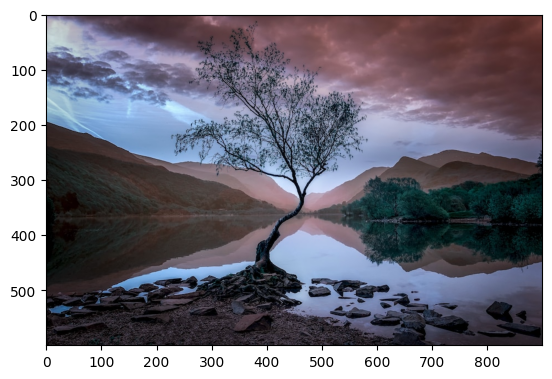

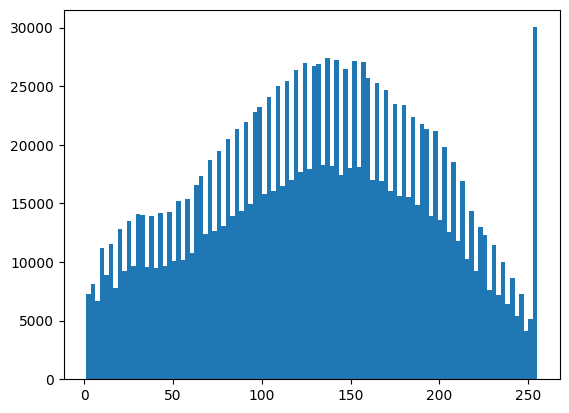


---------------------------------

Mean:    129.65843205072778
Minimum: 0
Maximum: 255



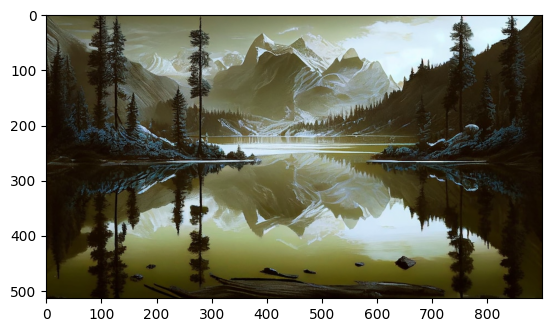

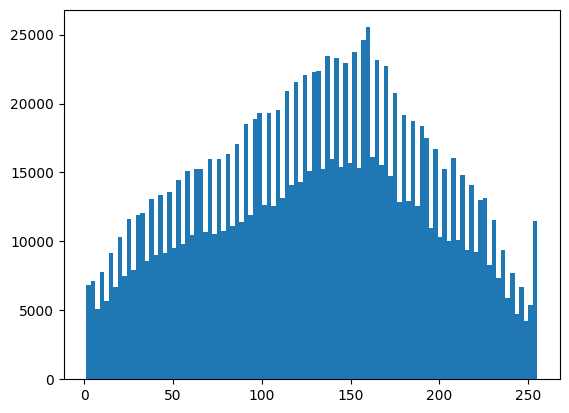


---------------------------------

Mean:    126.47677530864198
Minimum: 0
Maximum: 255



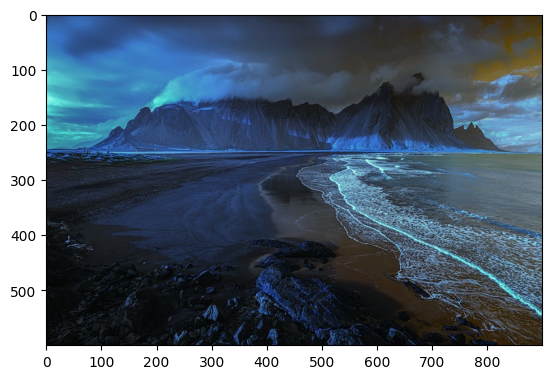

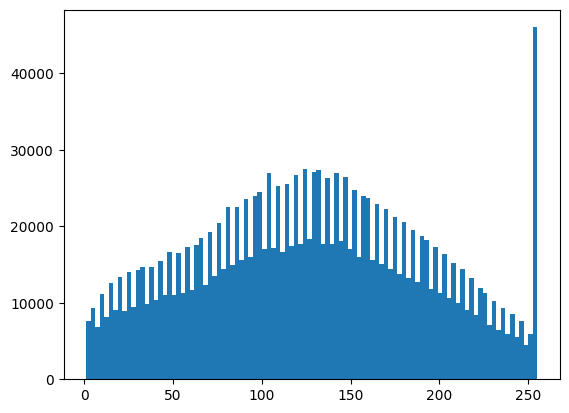

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

def getImageWithHist(imageLink, clipLimit=40):
  respons = requests.get(imageLink, stream=True).raw
  image = np.asarray(bytearray(respons.read()), dtype="uint8")
  image = cv.imdecode(image, cv.IMREAD_COLOR)
  plt.imshow(image)

  imageCopy = image.copy()
  ycrcbImage = cv.cvtColor(imageCopy, cv.COLOR_BGR2YCrCb)
  clahe = cv.createCLAHE(clipLimit=clipLimit, tileGridSize=(8, 8))
  ycrcbImage[:, :, 0] = clahe.apply(ycrcbImage[:, :, 0])
  claheEqualizedImage= cv.cvtColor(ycrcbImage, cv.COLOR_YCrCb2BGR)
  plt.show(img2hist(claheEqualizedImage))

getImageWithHist("https://img.freepik.com/free-photo/lone-tree_181624-46361.jpg?w=900&t=st=1702330232~exp=1702330832~hmac=22af416479ab5960aeb347094a93f2f08a29cb7d66df5a225a48d7c366e05d7b", 40)
getImageWithHist("https://img.freepik.com/free-photo/a-painting-of-a-mountain-lake-with-a-mountain-in-the-background_188544-9126.jpg?w=900&t=st=1702330325~exp=1702330925~hmac=0209473d3fd15d413de9f03b2a5ef37f34188155216055316264918516e096ce", 40)
getImageWithHist("https://img.freepik.com/free-photo/aerial-beautiful-shot-of-a-seashore-with-hills-on-the-background-at-sunset_181624-24143.jpg?w=900&t=st=1702330377~exp=1702330977~hmac=3f6a31ce9faf72fba3bea071cef75370d7be138ef4ab2e717c1742b47c39b2a7", 40)

## Задание №4. Создание растрового изображения

### Задание №4.1 Создайте полностью черное растровое изображение с размерностью (1920, 1080, 3)

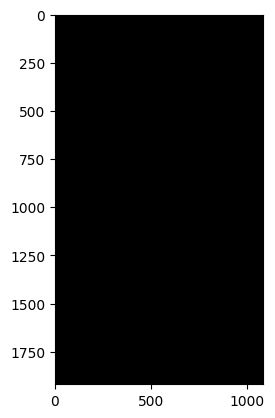

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

image = np.zeros((1920, 1080, 3), np.uint8)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

### Задание №4.2. Напишите функцию, которая принимает на вход изображение и целое число n. После чего функция возвращает изображение с числом n графических объектов из линий в верхней части (выше половины высоты). Графические объекты находятся в случайных местах и выглядят следующим образом:

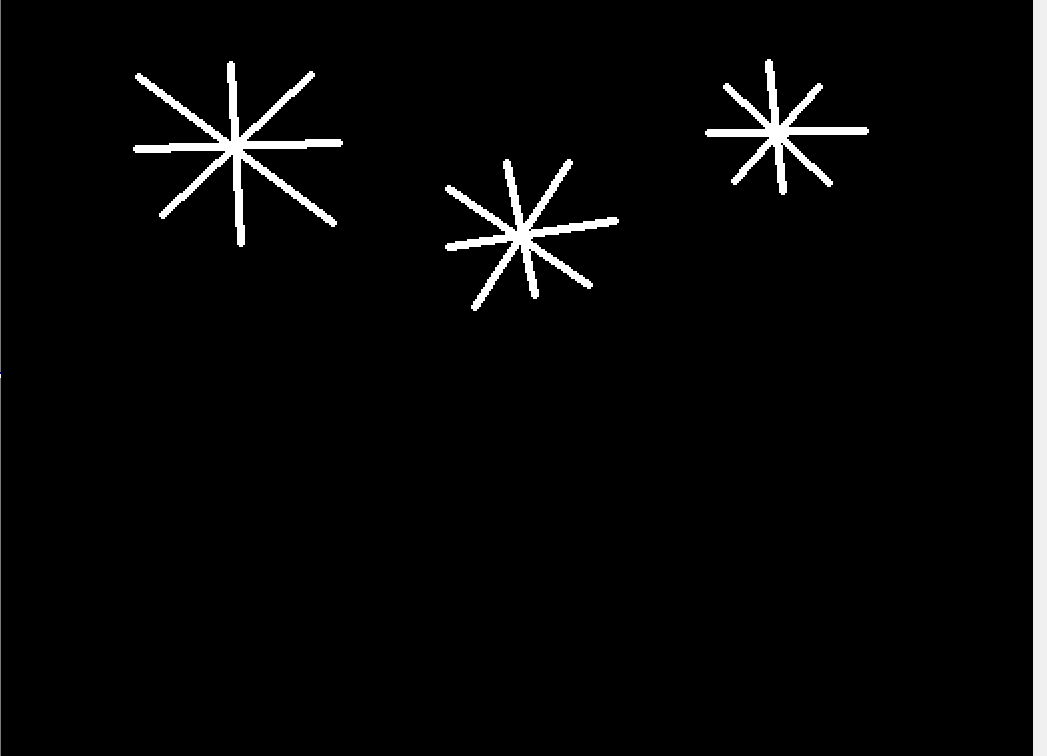

Введите количество объектов: 3


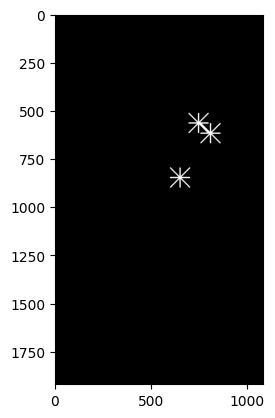

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def getImageWithLineObjects(image, n = 3):
  plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  xStart = 100
  xStop = 880
  yStart = 100
  yStop = 860
  for count in range(n):
    x = random.randint(xStart, xStop)
    y = random.randint(yStart, yStop)

    point1 = (x, y)
    point2 = (x, y + 50)
    point3 = (x + 50, y + 50)
    point4 = (x + 50, y)
    point5 = (x + 50, y - 50)
    point6 = (x, y - 50)
    point7 = (x - 50, y - 50)
    point8 = (x - 50, y)
    point9 = (x - 50, y + 50)
    color = (255, 255, 255)

    thickness = 5

    cv.line(image, point1, point2, color, thickness)
    cv.line(image, point1, point3, color, thickness)
    cv.line(image, point1, point4, color, thickness)
    cv.line(image, point1, point5, color, thickness)
    cv.line(image, point1, point6, color, thickness)
    cv.line(image, point1, point7, color, thickness)
    cv.line(image, point1, point8, color, thickness)
    cv.line(image, point1, point9, color, thickness)

    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))


image = np.zeros((1920, 1080, 3), np.uint8)
n = int(input("Введите количество объектов: "))
getImageWithLineObjects(image, n)

### Задание №4.3. Напишите функцию, которая принимает на вход изображение и целое число n. После чего функция возвращает изображение с числом n графических объектов из кругов в нижней части. Графические объекты находятся в случайных местах и выглядят следующим образом:

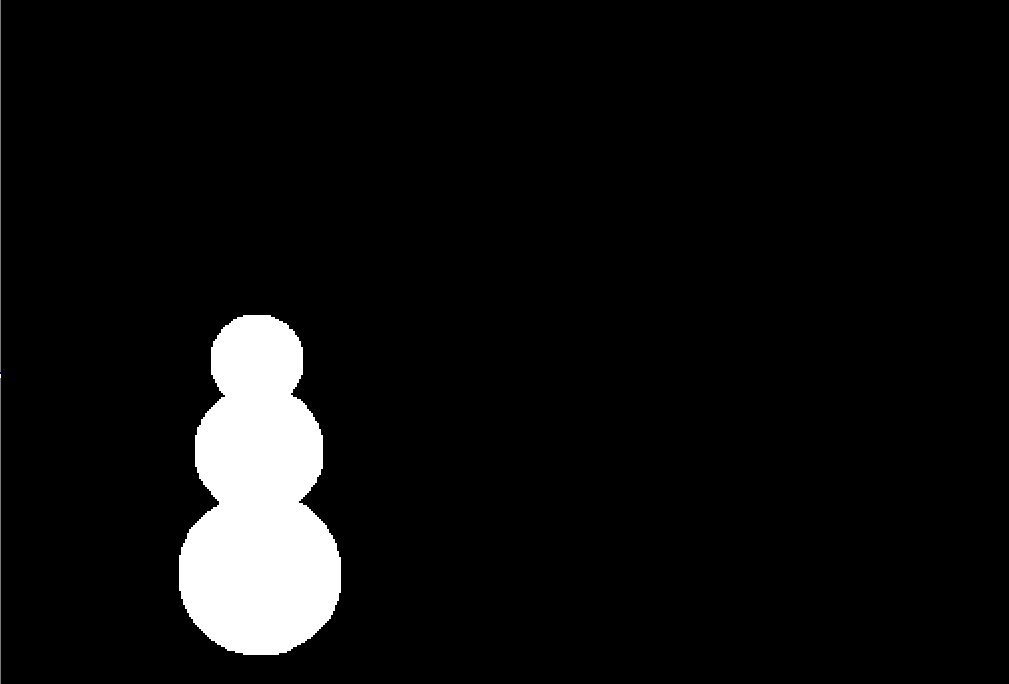

Введите количество объектов: 3


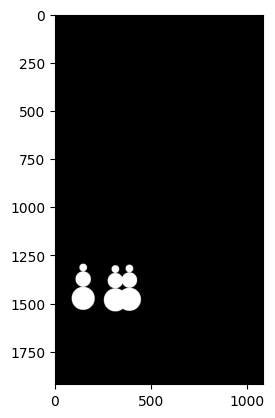

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def getImageWithCircleObjects(image, n = 3):
  plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  xStart = 80
  xStop = 500
  yStart = 1460
  yStop = 1520
  for count in range(n):
    x = random.randint(xStart, xStop)
    y = random.randint(yStart, yStop)
    radius = 60
    for count in range(n):
      point = (x, y)
      thickness = 5
      color = (255, 255, 255)
      cv.circle(image, point, radius, color, -1)
      radius -= 20
      y -= (radius * 2 + 20)
      plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))


image = np.zeros((1920, 1080, 3), np.uint8)
n = int(input("Введите количество объектов: "))
getImageWithCircleObjects(image, n)

### Задание №4.4. Напишите функцию, которая принимает на вход изображение и целое число n. После чего функция возвращает изображение с числом n графических объектов из полигонов в нижней части. Графические объекты находятся в случайных местах и выглядят следующим образом:

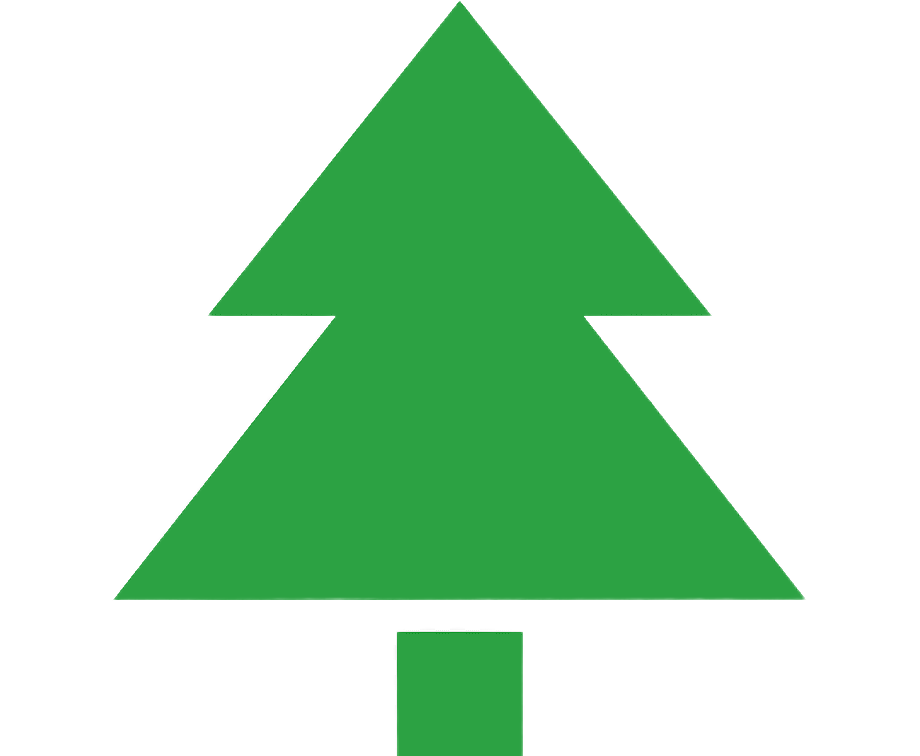

Введите количество объектов: 3


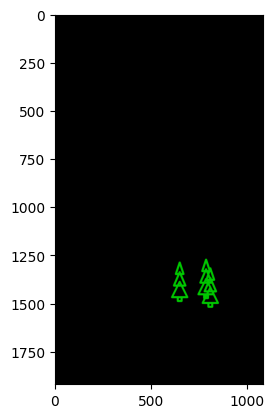

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
import cv2 as cv

def getImageWithPolygonObjects(image, n = 3):
  plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  xStart = 580
  xStop = 1000
  yStart = 1460
  yStop = 1520
  for count in range(n):
    x = random.randint(xStart, xStop)
    y = random.randint(yStart, yStop)
    color = (0, 200, 0)
    points = np.array([[x + 10, y + 10], [x - 10, y + 10], [x - 10, y - 10], [x + 10, y - 10]], np.int32)
    points = points.reshape((-1, 1, 2))
    cv.polylines(image, [points], True, color, 10)
    plt.imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
    weigh = 40
    height = 90
    for count in range(n):
      points = np.array([[x, y - height], [x - weigh , y - 10], [x + weigh , y - 10]], np.int32)
      points = points.reshape((-1, 1, 2))
      cv.polylines(image, [points], True, color, 10)
      plt.imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
      y -= 60
      height -= 10
      weigh -= 10


image = np.zeros((1920, 1080, 3), np.uint8)
n = int(input("Введите количество объектов: "))
getImageWithPolygonObjects(image, n)


### Задание №4.5. Напишите функцию, которая принимает на вход изображение и строку. После чего функция возвращает изображение с наложенным на него текстом из строки.

Текст должен располагаться в нижней четверти изображения и выровнен по середине

Введите строку для отображения: Happy New Year!


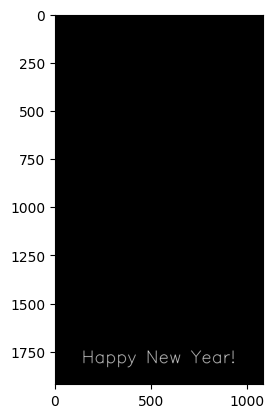

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def getImageWithTextObjects(image, text):
  plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  font = cv2.FONT_HERSHEY_SIMPLEX
  fontScale = 3
  color = (255, 255, 255)
  thickness = 2
  textsize = cv2.getTextSize(text, font, fontScale, thickness)[0]
  textX = int((image.shape[1] - textsize[0]) / 2)
  textY = int((image.shape[0] - textsize[1]) / 1.025)
  org = (textX, textY)
  imageNew = cv2.putText(image, text, org, font, fontScale, color, thickness,
                      cv2.LINE_AA)
  plt.imshow(imageNew)

image = np.zeros((1920, 1080, 3), np.uint8)
text = str(input("Введите строку для отображения: "))
getImageWithTextObjects(image, text)

### Задание №4.6. Примените каждую из этих функций к изображению, созданному в пункте 4.1.

Введите количество объектов: 3
Введите количество объектов: 3
Введите количество объектов: 3
Введите строку для отображения: Happy New Year!


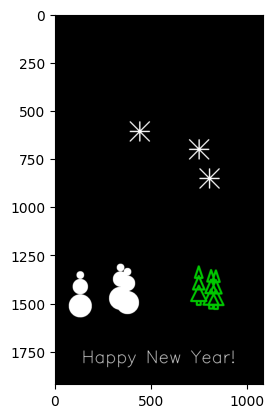

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

image = np.zeros((1920, 1080, 3), np.uint8)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
n = int(input("Введите количество объектов: "))
getImageWithLineObjects(image, n)
n = int(input("Введите количество объектов: "))
getImageWithCircleObjects(image, n)
n = int(input("Введите количество объектов: "))
getImageWithPolygonObjects(image, n)
text = str(input("Введите строку для отображения: "))
getImageWithTextObjects(image, text)

## Задание 5. С помощью методов определения границ и побитовых операций создайте маску двух лун на изображении и переместите их на отдельный растр

**Ссылка на изображение:** https://kartinki.pics/pics/uploads/posts/2022-09/1662081725_33-kartinkin-net-p-pribivayushchaya-luna-krasivo-37.jpg

Пример:

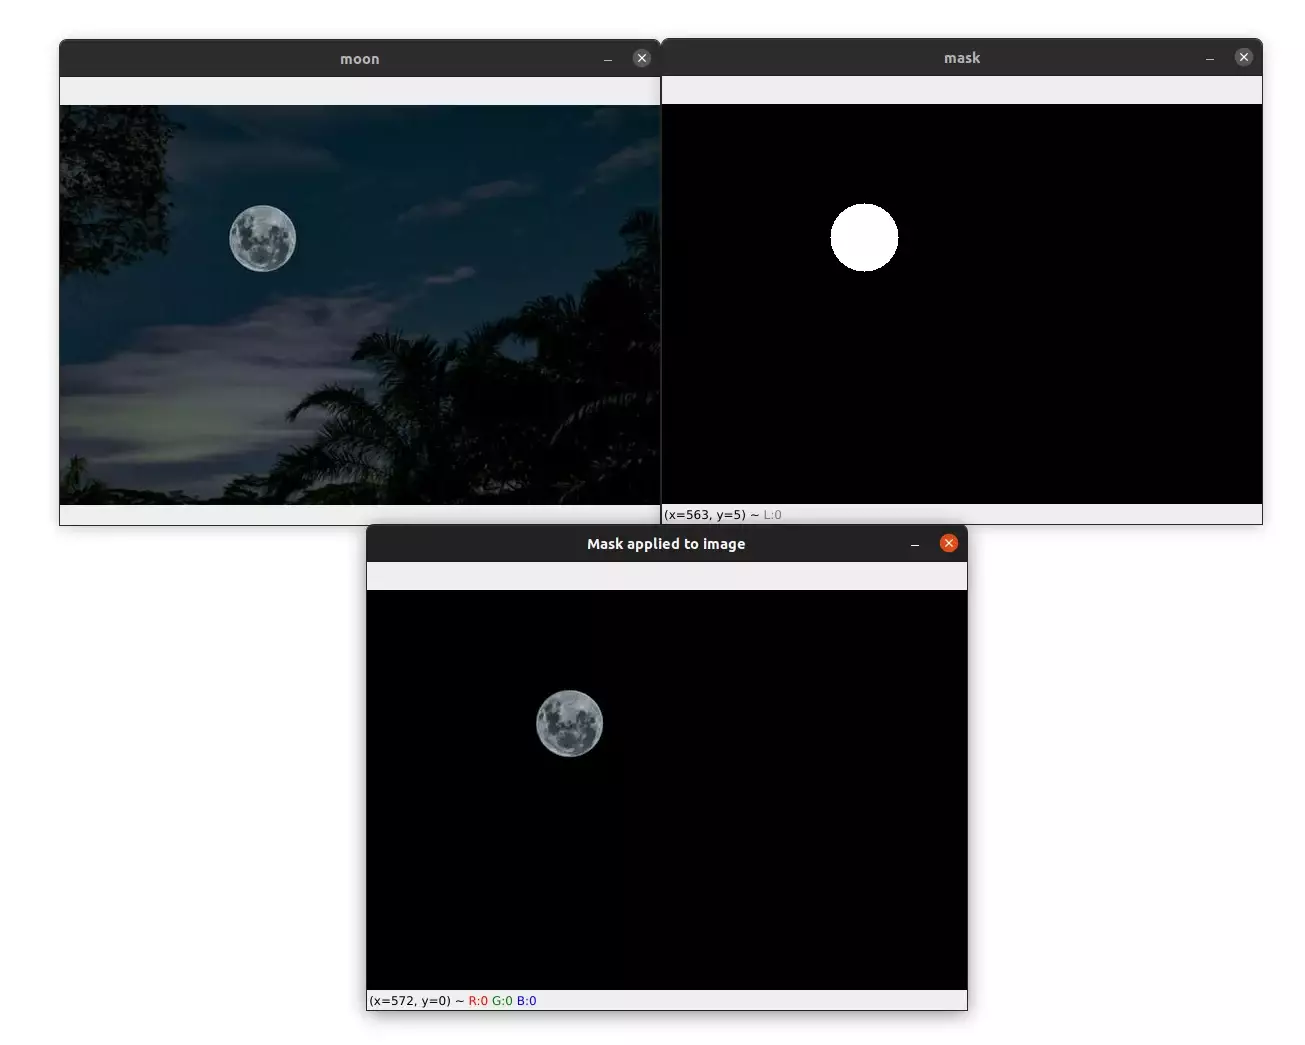

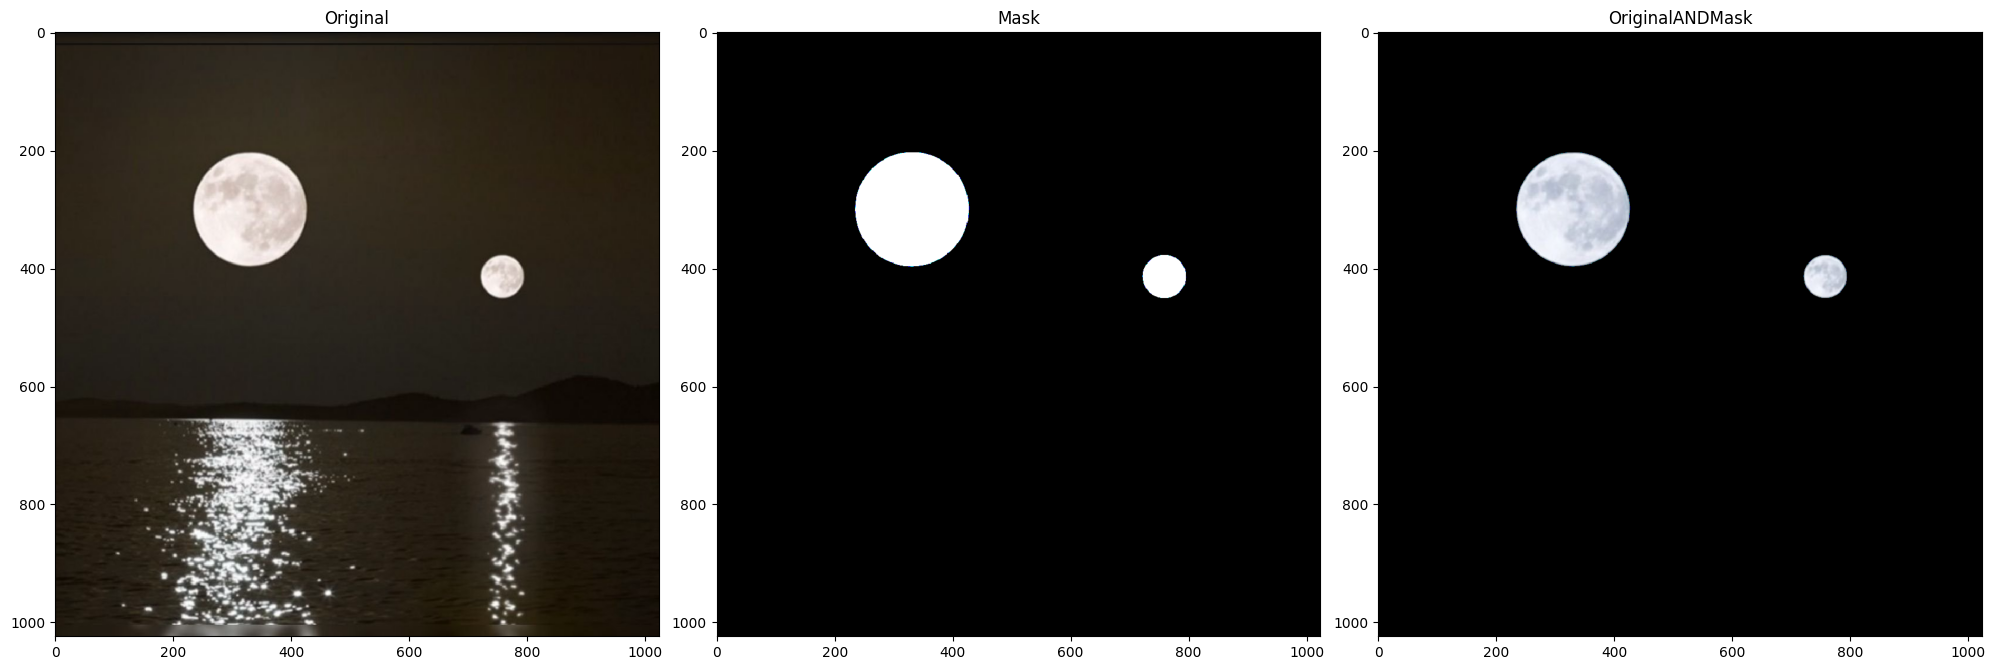

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import random

img = cv2.imread("/content/moons.jpg")

def get_top(image, n):
    height, width, _ = image.shape
    lower = image[height//2:, :, :]
    for _ in range(n):
        color = (0, 0, 0) #черный для маски
        cv2.rectangle(lower, (height, width), (-height, -width), color, -1)
    return image

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
fig.tight_layout()

ax[0].imshow(img)
ax[0].set_title("Original")

result = get_top(img, 1)

ret, th = cv.threshold(result, 100, 255, cv.THRESH_BINARY)
ax[1].imshow(cv.cvtColor(th, cv.COLOR_BGR2RGB))
ax[1].set_title("Mask")

result = cv.bitwise_and(img, th)

ax[2].imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
ax[2].set_title("OriginalANDMask")

plt.show()


## Задание 6. Работа с данными радиолокационной съемки (SAR)

&nbsp;Синтетическая апертурная радиолокация (SAR), является технологией, используемой для получения высокого качества радарного изображения земной поверхности. В отличие от обычных радаров, которые работают с помощью передачи и приема радиосигналов, SAR использует активную систему, которая генерирует собственные радиосигналы и обрабатывает их отражения от поверхности, чтобы создать изображение.

Принцип работы SAR основан на анализе времени отклика радиоволн, отраженных от поверхности Земли. Радиоволны, испускаемые SAR, имеют определенную длину волны и частоту. Когда эти волны попадают на поверхность, часть из них отражается обратно к радару. Сигнал отражается от таких объектов, как здания, леса, водные объекты и даже от небольших изменений рельефа поверхности.

&nbsp; SAR изображения содержат каналы HH (горизонтально-горизонтальная поляризация) и HV (горизонтально-вертикальная поляризация), представляющие различные комбинации направления падающей и рассеиваемой энергии радиоволн.

&nbsp; Канал HH используется для улучшения разрешающей способности и детализации объектов на изображении, особенно для плотных структур и материалов с границами и разделениями.

&nbsp;Канал HV используется для выявления изменений в состоянии поверхности земли, таких как уровень воды в реках, засухи, обледенение и т. д. Он также может дополнять информацию в канале HH, предоставляя данные о рассеивающих свойствах поверхности.

&nbsp;Каналы HH и HV могут быть комбинированы для создания композитных изображений, предоставляющих лучшую видимость и возможность анализа объектов и изменений на поверхности Земли. Это позволяет получить полезные данные о структурах, влажности, границах и других характеристиках поверхности.

> SAR изображения очень полезны в различных областях, включая геологию, астрономию, экологию и оборону. В геологии они могут использоваться для изучения геологических структур, обнаружения нефтяных и газовых месторождений, а также оценки поверхностного движения земной коры. В астрономии SAR может помочь изучать поверхность планет и спутников, а также обнаруживать и измерять астероиды и кометы. В экологии SAR помогает отслеживать изменения в растительности, выявлять лесные пожары и контролировать использование земли. В военной сфере SAR используется для обнаружения и идентификации целей на земле или на воде, независимо от условий освещения.

### Задание 6.1. Загрузите изображение и откройте его:

1. В OpenCV в режиме **cv.IMREAD_UNCHANGED**
2. В matplotlib в обычном режиме

Ссылка на изображение: https://cloud.mail.ru/public/HEvc/aY7eMhHor

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import urllib.request
import re
import requests
def getDirectLinkFromMailCloudUrl(link):

    response = requests.get(link)
    page_content = response.text

    re_pattern = r'dispatcher.*?weblink_get.*?url":"(.*?)"'
    match = re.search(re_pattern , page_content)

    if match:
        url = match.group(1)
        parts = link.split('/')[-2:]
        url = f'{url}/{parts[0]}/{parts[1]}'
        return url
    return None

changed_link = getDirectLinkFromMailCloudUrl('https://cloud.mail.ru/public/HEvc/aY7eMhHor') # link should look like 'https://cloud.mail.ru/public/XXX/YYYYYYYY'
urllib.request.urlretrieve(changed_link, 'task6.tif')

('task6.tif', <http.client.HTTPMessage at 0x783ba3efa140>)

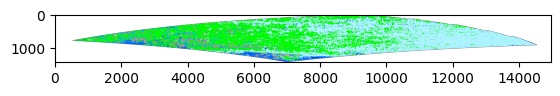

In [109]:
import tifffile as tiff

img6 = tiff.imread('/content/task6.tif')
plt.imshow(img6)

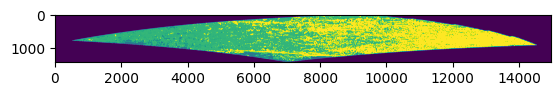

In [86]:
image_opencv = cv2.imread("/content/drive/MyDrive/tiffImage.tif", cv2.IMREAD_UNCHANGED)
plt.imshow(image_opencv)

### Задание 6.2. Проанализируйте изображение

Выведите тип изображения:

In [87]:
print("Data type of image is ", img.dtype)

image_type = type(img)
print(image_type)

Data type of image is  uint16
<class 'numpy.ndarray'>


Выведите его размерность:

In [88]:
print("Image size is ", img.shape)

Image size is  (1422, 14958, 4)


Отобразите отдельно каждый канал, используя метод cv2_imshow():

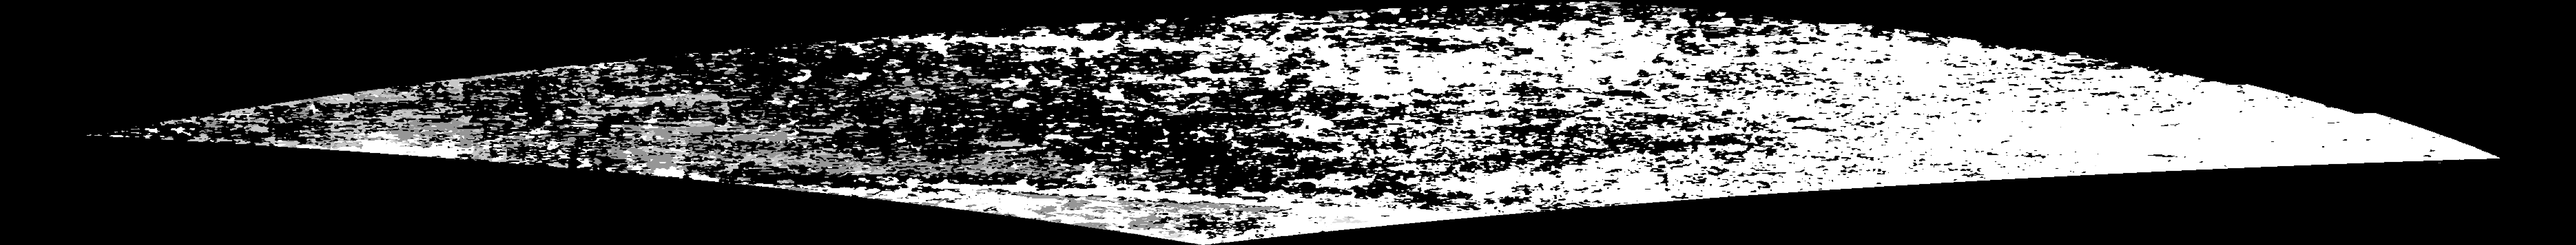

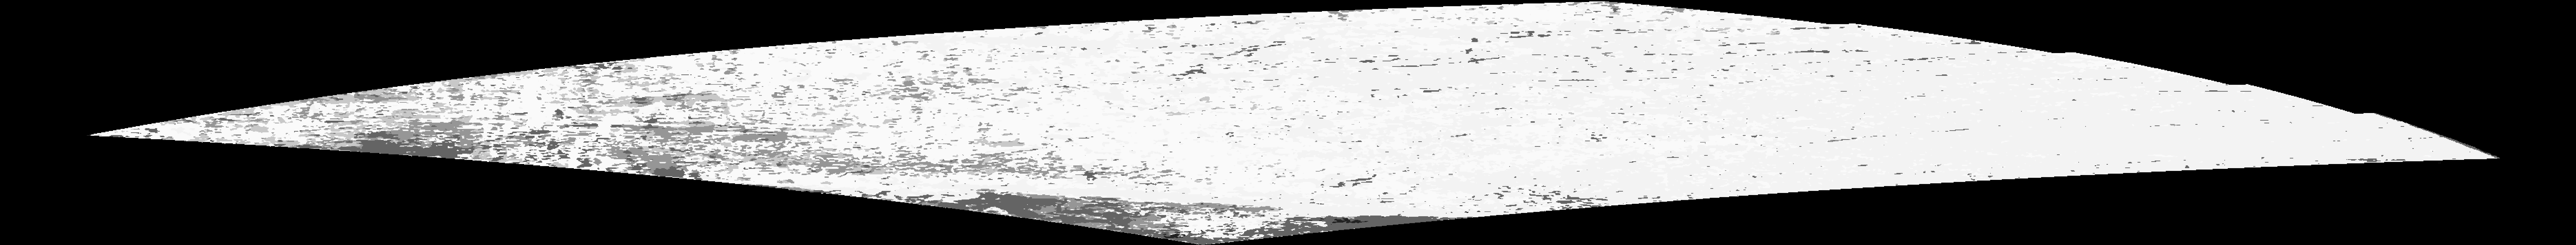

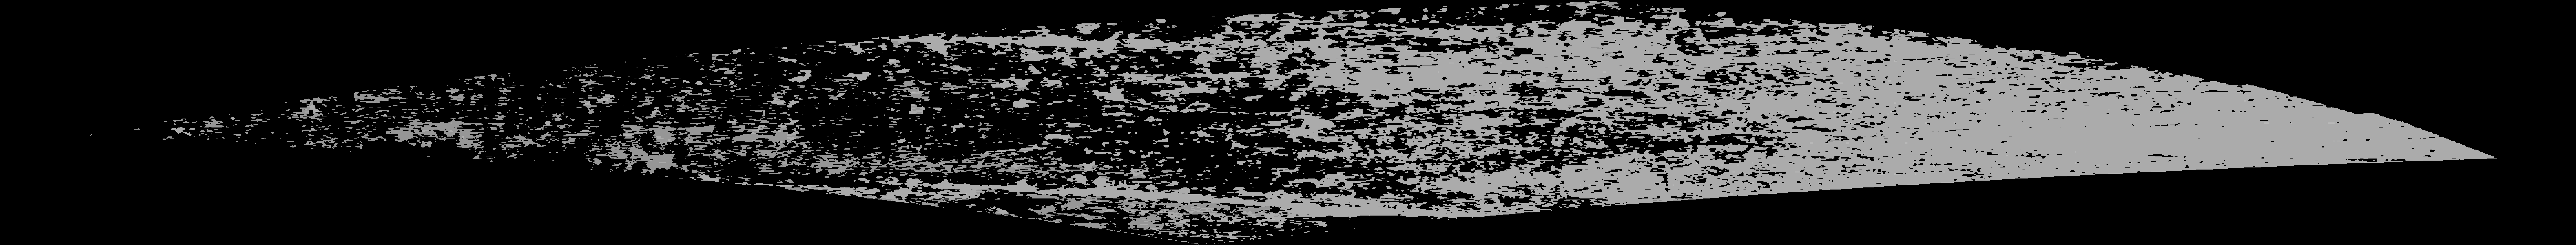

In [89]:
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)

Отобразите отдельно каждый канал, используя matplotlib:

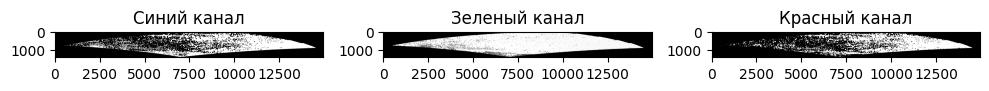

In [90]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(b, cmap='gray')
plt.title('Синий канал')

plt.subplot(1, 3, 2)
plt.imshow(g, cmap='gray')
plt.title('Зеленый канал')

plt.subplot(1, 3, 3)
plt.imshow(r, cmap='gray')
plt.title('Красный канал')

plt.tight_layout()
plt.show()

Сделайте вывод:


*ВАШ ВЫВОД*

Постройте гистограмму изображения, используя функцию img2hist() из теоретических материалов:

Mean:    91.9323891706906
Minimum: 0
Maximum: 255


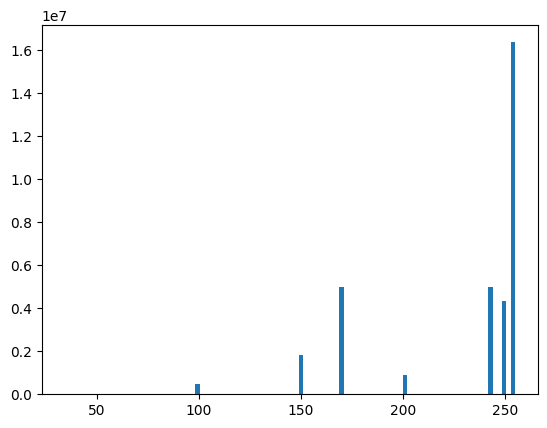

In [91]:
def img2hist(temp_img, label = True):
    # Копируем изображение в переменную histogram для дальнейшего преобразования в гистограмму.
    histogram = np.copy(temp_img)

    # Создаем объект для отображения графика.
    ax = plt.subplots()

    # Если параметр label == True, то выводим статистику по изображению.
    if label != None:
        print(f'Mean:    {histogram.mean()}')  # Среднее значение интенсивности пикселей.
        print(f'Minimum: {histogram.min()}')  # Минимальное значение интенсивности пикселей.
        print(f'Maximum: {histogram.max()}')  # Максимальное значение интенсивности пикселей.

    # Фильтруем изображение, удаляя все пиксели с интенсивностью равной 0 (обычно фон).
    histogram = histogram[histogram != 0]

    # Возвращаем гистограмму распределения интенсивности пикселей для обработанного изображения.
    # Гистограмма строится на основе списка значений интенсивности, преобразованного в одномерный массив (с помощью flatten()),
    # и разбита на 100 столбцов (bins=100).
    return plt.hist(histogram.flatten(), bins=100)
plt.show(img2hist(img))

### Задание 6.3. Нормализация SAR-изображения

Перевод в децибелы (dB) может быть полезным для ряда причин при обработке и анализе SAR изображений:

1. Нормализация: Перевод в децибелы может использоваться для нормализации значений яркостей на изображении. Такая нормализация позволяет визуально сравнивать яркости пикселей в разных областях изображения или разных изображениях.

2. Логарифмическая шкала: Децибелы предоставляют логарифмическую шкалу для оценки яркости сигналов. Логарифмическая шкала часто используется для измерения или анализа сигналов, так как она более чувствительна к изменениям в слабых сигналах и может помочь в выявлении слабых расположенных объектов.

3. Снижение динамического диапазона: Одним из преимуществ перевода в децибелы является снижение динамического диапазона значений яркости. Это может быть полезным при обработке и визуализации изображений, так как позволяет лучше выделить детали, особенности и структуры, которые могут быть затеряны в более широком динамическом диапазоне значений.

4. Чувствительность к изменениям: Перевод в децибелы позволяет лучше отслеживать и измерять изменения яркости. Изменения в яркости изображений в децибелах отражают более пропорциональные изменения в амплитуде сигнала, что может быть полезным, например, при обработке временных рядов или отслеживании изменений в рамках одного изображения.

**Переведите изображение в децибелы, используя следующую функцию:**

In [92]:
import numpy as np

def img2dB(image_o, eps=1e-10):
    image = image_o.copy().astype(np.float32)
    dB = np.where(image > eps, image, -10)
    np.log10(dB, where=dB > 0).astype(np.float32)
    return dB
img2dB(img)

array([[[-10., -10., -10., -10.],
        [-10., -10., -10., -10.],
        [-10., -10., -10., -10.],
        ...,
        [-10., -10., -10., -10.],
        [-10., -10., -10., -10.],
        [-10., -10., -10., -10.]],

       [[-10., -10., -10., -10.],
        [-10., -10., -10., -10.],
        [-10., -10., -10., -10.],
        ...,
        [-10., -10., -10., -10.],
        [-10., -10., -10., -10.],
        [-10., -10., -10., -10.]],

       [[-10., -10., -10., -10.],
        [-10., -10., -10., -10.],
        [-10., -10., -10., -10.],
        ...,
        [-10., -10., -10., -10.],
        [-10., -10., -10., -10.],
        [-10., -10., -10., -10.]],

       ...,

       [[-10., -10., -10., -10.],
        [-10., -10., -10., -10.],
        [-10., -10., -10., -10.],
        ...,
        [-10., -10., -10., -10.],
        [-10., -10., -10., -10.],
        [-10., -10., -10., -10.]],

       [[-10., -10., -10., -10.],
        [-10., -10., -10., -10.],
        [-10., -10., -10., -10.],
        .

**Напишите функцию img_to_uint(I), которая принимает на вход одномерный массив I и выполняет следующие действия:**

1. Находит минимальное значение mn и максимальное значение mx в массиве I.
2. Вычитает mn из mx.
3. Нормализует значения в массиве I, применяя следующую формулу: (I - mn)/mx.
4. Умножает результат на 255.
5. Возвращает массив I, приведенный к типу np.uint8. (Команда: I.astype(np.uint8))

Пример использования функции:

I = np.array([10, 20, 30, 40, 50])
normalized_I = img_to_uint(I)
print(normalized_I)

Результат:
array([  0,  63, 127, 191, 255], dtype=uint8)

In [93]:
import numpy as np

def img_to_uint(I):
    mn = np.min(I)
    mx = np.max(I)
    I_normalized = (I - mn) / (mx - mn)
    I_scaled = I_normalized * 255
    return I_scaled.astype(np.uint8)
img_to_uint(np.array([10, 20, 30, 40, 50]))

array([  0,  63, 127, 191, 255], dtype=uint8)

**Примените эту функцию к переведенному в децибелы изображению:**

In [94]:
img_to_uint(img2dB(img))

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

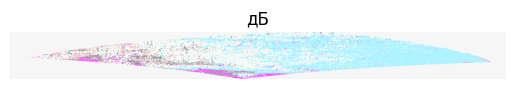

In [95]:
image_gray_db = img2dB(img_to_uint(img2dB(img)))
image_gray_db = image_gray_db.astype(np.uint8)

plt.imsave(f"image_db.jpg", image_gray_db, cmap='gray')

plt.imshow(image_gray_db)
plt.axis('off')
plt.title('дБ')
plt.show()

### Задание 6.4. Повышение контрастности изображения

**Разбейте изображение на отдельные каналы:**

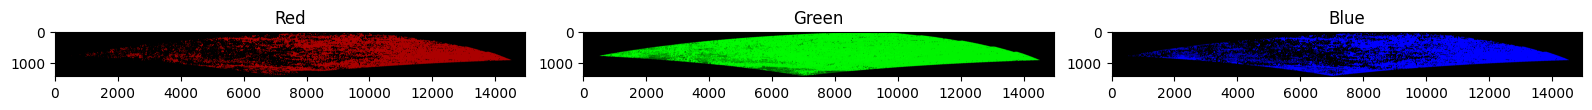

In [96]:
import tifffile as tiff
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = tiff.imread("/content/drive/MyDrive/tiffImage.tif")

# Разделение изображения на отдельные каналы
r = img[:, :, 0]  # Красный канал
g = img[:, :, 1]  # Зеленый канал
b = img[:, :, 2]  # Синий канал


    # Создаем массив, заполненный нулями, того же размера, что и исходное изображение, но только для двух измерений, поскольку это будет использовано для масок цветов
zeros = np.zeros(img.shape[:2], dtype=r.dtype)

fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig.tight_layout()

# Создаем изображение, в котором активен только красный канал, два других канала заполнены нулями
red = cv2.merge([r, zeros, zeros])
# Аналогично для зеленого канала
green = cv2.merge([zeros, g, zeros])
# Аналогично для синего канала
blue = cv2.merge([zeros, zeros, b])

ax[0].imshow(red)
ax[0].set_title("Red")

ax[1].imshow(green)
ax[1].set_title("Green")

ax[2].imshow(blue)
ax[2].set_title("Blue")

plt.show()


**С помощью методов для выравнивания гистограммы (адаптивного и не адаптивного), подберите оптимальные параметры контрастности отдельно для каждого канала, таким образом чтобы на них было видно как можно больше деталей и не было много шума:**

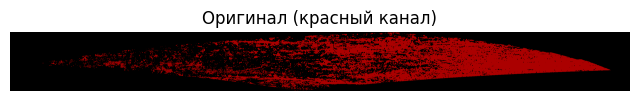

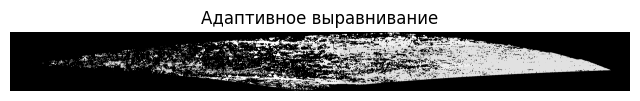

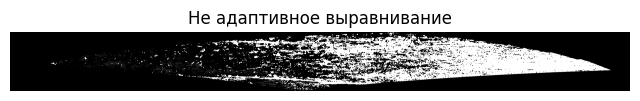

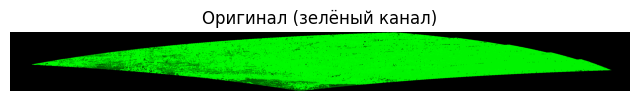

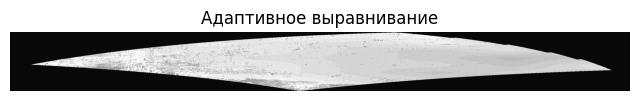

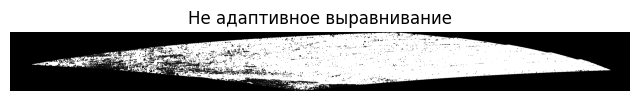

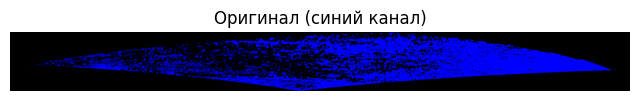

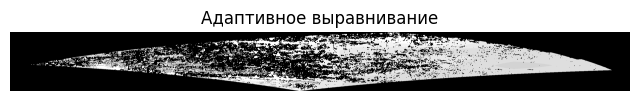

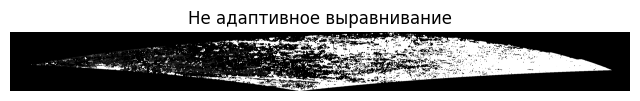

In [97]:
def img_look(temp_image,tes):
  image = temp_image
  # оригинал
  tes1 = "Оригинал "+tes
  plt.figure(figsize=(8, 8))
  plt.imshow(image)
  plt.axis('off')
  plt.title(tes1)
  plt.show()

  # дБ конверт
  image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  image_gray_db = 10 * np.log10(image_gray + 1)
  image_gray_db = image_gray_db.astype(np.uint8)

  # plt.figure(figsize=(8, 8))
  # plt.imshow(image_gray_db, cmap='gray')
  # plt.axis('off')
  # plt.title('дБ')
  # plt.show()

  # адаптив
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
  image_clahe_adaptive = clahe.apply(image_gray_db)

  plt.figure(figsize=(8, 8))
  plt.imshow(image_clahe_adaptive, cmap='gray')
  plt.axis('off')
  plt.title('Адаптивное выравнивание')
  plt.show()

  # неадаптив, клахе
  image_clahe_non_adaptive = cv2.equalizeHist(image_gray_db)

  plt.figure(figsize=(8, 8))
  plt.imshow(image_clahe_non_adaptive, cmap='gray')
  plt.axis('off')
  plt.title('Не адаптивное выравнивание')
  plt.show()

  #tes2 = 'AdaptiveSave '+tes
  plt.imsave(f"image_{tes}.jpg", image_clahe_adaptive, cmap='gray')


img_look(red,"(красный канал)")
img_look(green, "(зелёный канал)")
img_look(blue, "(синий канал)")

Объедините каналы в одно изображение, в качестве третьего канала используйте целочисленное частное первого и второго каналов, т.е.:



```
Channel_1 = Channel_1
Channel_1 = Channel_2
Channel_3 = int(Channel_1/Channel_2)
```







<ipython-input-98-8e6d11747014>:2: RuntimeWarning: divide by zero encountered in floor_divide
  image = cv2.merge([b, g, b//g])


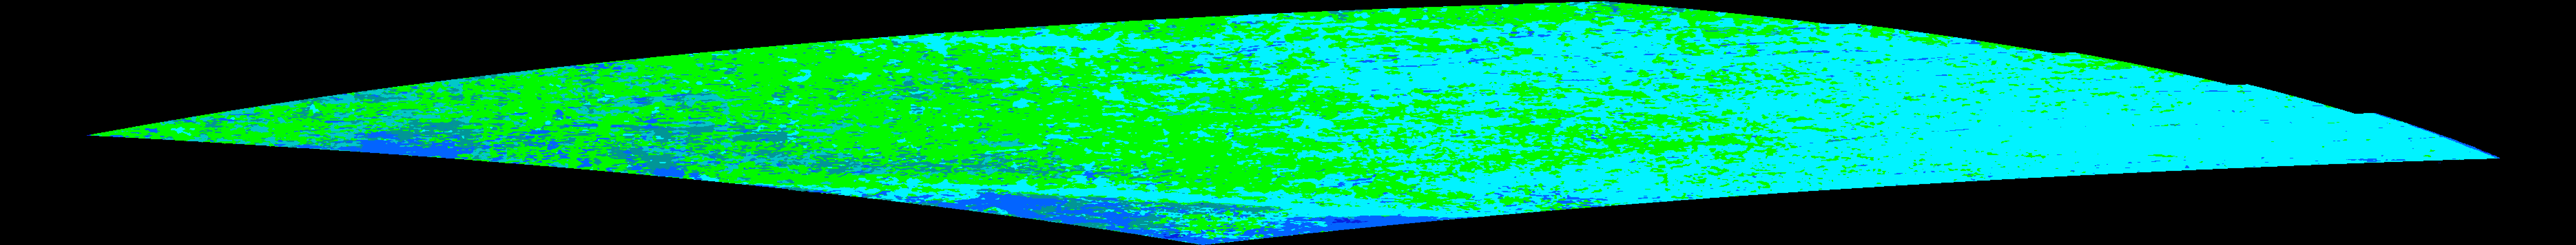

-1

In [98]:
# Объединение каналов
image = cv2.merge([b, g, b//g])
# Отображение изображения
cv2_imshow(image)
cv2.waitKey(0)


### Задание 6.5. Определение границ на изображении

В данном задании следует использовать изображение, полученное на предыдущем этапе. Поэкспериментируйте с разными методами для определения границ и выведите лучшие результаты:

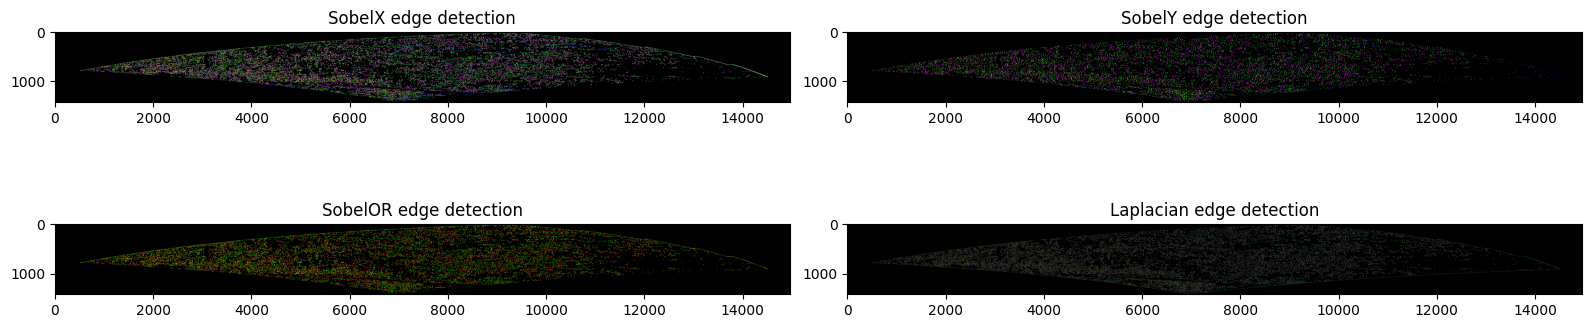

In [99]:
image_1 = image

sobel_x = cv2.Sobel(image_1, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(image_1, cv2.CV_64F, 1, 0, ksize=5)
sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)
laplacian = cv2.Laplacian(image_1, cv2.CV_64F)
fig, ax = plt.subplots(2, 2, figsize=(16, 4))
fig.tight_layout()

ax[0][0].imshow(sobel_x, cmap="gray")
ax[0][0].set_title("SobelX edge detection")

ax[0][1].imshow(sobel_y, cmap="gray")
ax[0][1].set_title("SobelY edge detection")

ax[1][0].imshow(sobel_OR, cmap="gray")
ax[1][0].set_title("SobelOR edge detection")

ax[1][1].imshow(laplacian, cmap="gray")
ax[1][1].set_title("Laplacian edge detection")

plt.show()

### Задание 6.5. Сегментация изображения по цветовому диапазону

Напишите функцию, которая принимает на вход **один канал** изображения и количество классов, после чего возвращает сегментированное изображение (маску)



Пример сегментации изображения (до и после):

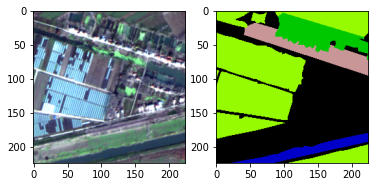

В Вашем случае сегментация происходит по следующим правилам:

1. Предположим, на вход функция получает изображение и число 4
2. Исходный диапазон (0, 255) делится на 4 промежутка: [0, 64), [64, 128), [128,192), [192,255]
3. Пиксели, интенсивность которых соответствует первому промежутку меняют свой цвет на красный, второму на черный, третьему на желтый, четвертому на зеленый (цвет Вы выбираете сами)
4.Получившаяся маска возвращается

Обратите внимание, что функция получает на вход один канал, а возвращать должна цветную маску(!), соответственно, у маски должно быть три канала. (Помним, что изображение это многомерный массив, в котором также можно замещать элементы с помощью перебора или математического аппарата numpy.)

**Сегментируйте первый канал изображения:**

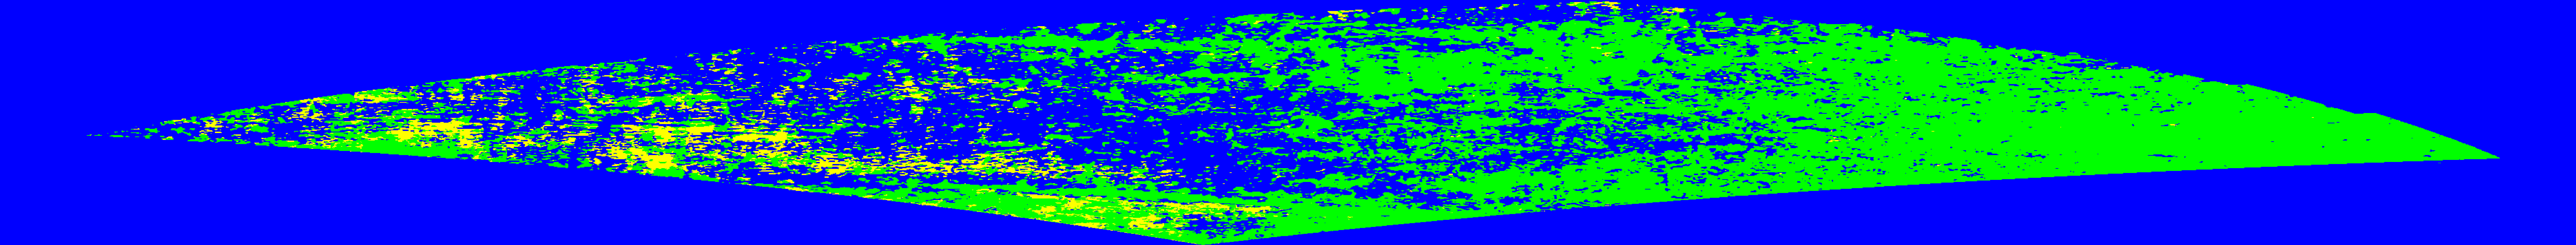

In [100]:
import numpy as np
import cv2

def color_mask(red_channel, num_intervals):
    # интервал
    interval_size = 256 // num_intervals

    # создана пустая маска с размером красного канала
    mask = np.zeros((red_channel.shape[0], red_channel.shape[1], 3), dtype=np.uint8)

    for i in range(num_intervals):
        lower_bound = i * interval_size
        upper_bound = (i + 1) * interval_size

        # цвета пикселов
        if i == 0:
            mask[(red_channel >= lower_bound) & (red_channel < upper_bound)] = [255, 0, 0]  # красну
        elif i == 1:
            mask[(red_channel >= lower_bound) & (red_channel < upper_bound)] = [0, 0, 0]  # черн
        elif i == 2:
            mask[(red_channel >= lower_bound) & (red_channel < upper_bound)] = [0, 255, 255]  # желт
        elif i == 3:
            mask[(red_channel >= lower_bound) & (red_channel < upper_bound)] = [0, 255, 0]  # зелен

    return mask

resulting_mask = color_mask(red_channel, 4)
cv2_imshow(resulting_mask)

**Сегментируйте второй канал изображения:**

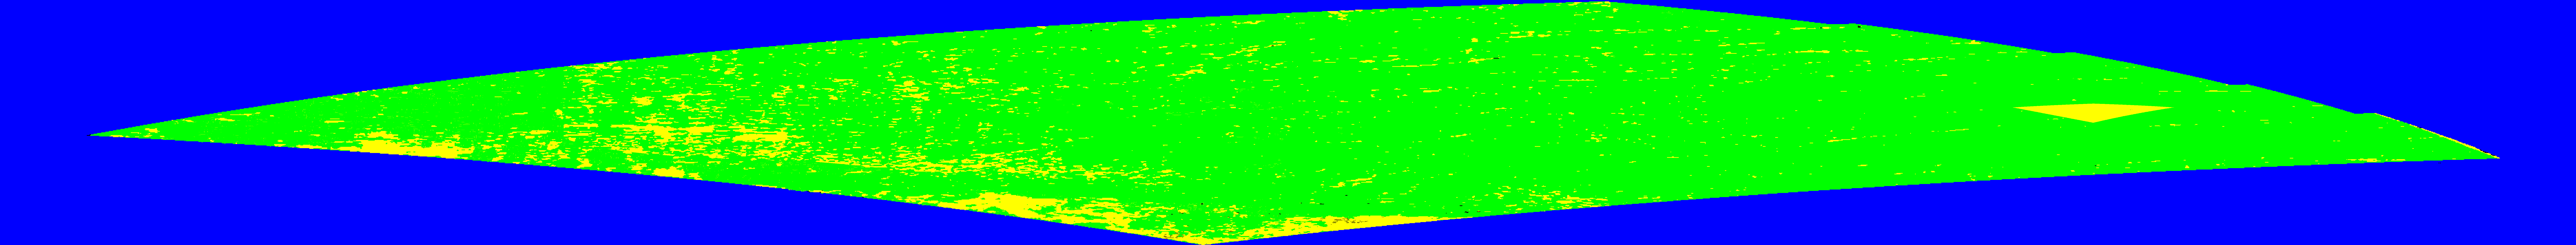

In [101]:
image = cv2.imread('/content/image_green.jpg')
red_channel = image[:,:,2]

resulting_mask2 = color_mask(red_channel, 4)
cv2_imshow(resulting_mask2)



**Сегментируйте третий канал изображения:**

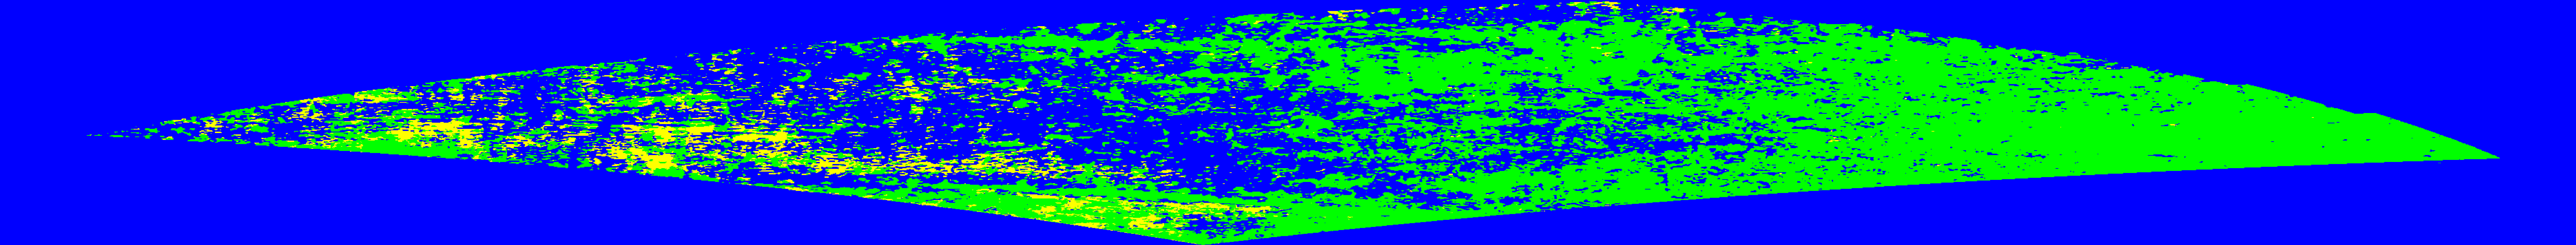

In [102]:
image = cv2.imread('/content/image_bluen.jpg')
red_channel = image[:,:,2]

resulting_mask3 = color_mask(red_channel, 4)
cv2_imshow(resulting_mask3)



### Задание 6.6. Выберите наилучший вариант сегментации и определите контуры получившихся объектов. После чего отсортируйте список контуров по возрастанию и пронумеруйте их по порядку, устанавливая метку с номером по центру. (Наибольший по площади объект в центре должен иметь число 1 и т.д.)

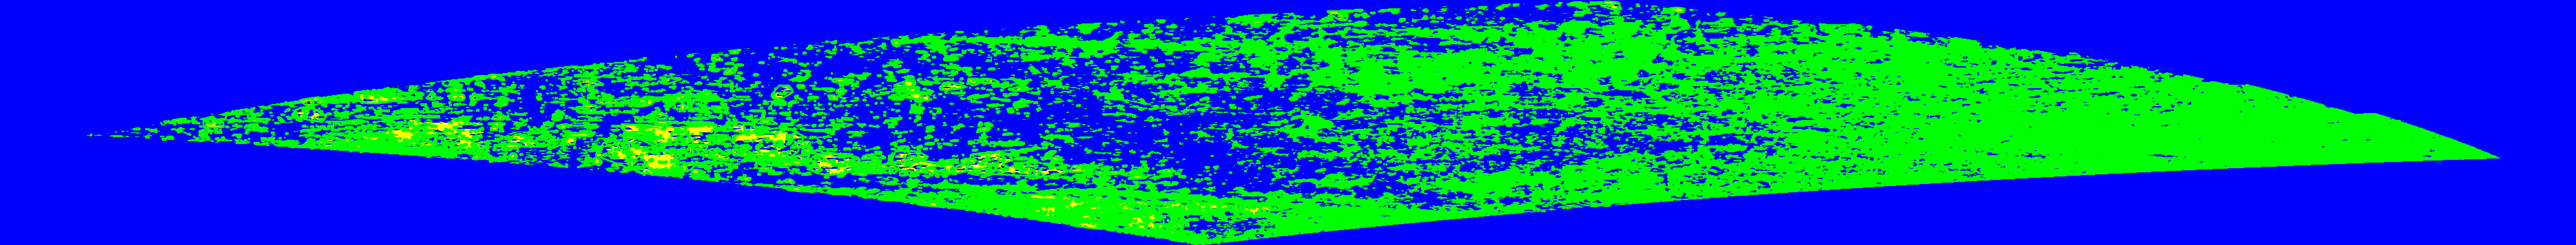

In [103]:
image = resulting_mask3

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Пороговый фильтр для получения бинарного изображения
ret, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

#Поиск контуров на бинарном изображении
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

#Сортировка найденных контуров по площади (исключая самый большой контур)
n = len(contours)-1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(image, [hull], 0, (0, 255, 0), 10)

cv2_imshow(cv2.cvtColor(image, cv2.THRESH_BINARY))

Sorted contours:  30127.5 23321.5 18854.5 17449.5 13489.0 13384.0 12344.0 10965.0 10332.5 6933.0 6709.5 5399.5 4606.5 4511.0 4494.0 4461.0 4269.5 4186.5 3790.0 3202.0 3086.5 2896.5 2896.0 2759.0 2715.5 2471.0 2410.0 2286.5 2263.0 2173.0 2112.0 2108.0 2093.0 2073.0 2059.0 2053.5 1873.5 1807.0 1747.0 1695.0 1642.0 1641.5 1640.5 1550.5 1538.5 1463.5 1460.0 1451.5 1433.0 1432.5 1425.5 1388.5 1385.0 1345.5 1298.5 1297.5 1291.5 1291.0 1247.0 1243.0 1240.5 1236.0 1213.5 1170.5 1158.0 1151.5 1150.0 1140.0 1130.5 1113.5 1069.0 1060.5 1053.0 1040.0 1036.5 1018.0 974.5 963.0 949.5 939.5 937.5 932.0 917.0 888.0 836.0 830.5 823.0 812.5 811.0 800.5 798.5 791.5 788.0 787.0 782.5 769.5 768.5 759.0 758.5 751.5 744.0 733.5 706.0 699.0 682.5 663.0 657.0 655.5 653.0 646.0 645.0 642.0 634.0 628.0 626.0 625.0 622.0 622.0 621.0 615.0 613.0 609.5 607.0 603.5 602.0 597.0 596.0 595.0 593.5 592.5 589.5 580.5 574.0 572.0 570.0 569.5 568.5 567.5 566.5 563.0 560.5 557.5 552.5 551.5 550.5 550.0 546.5 540.5 540.5 538

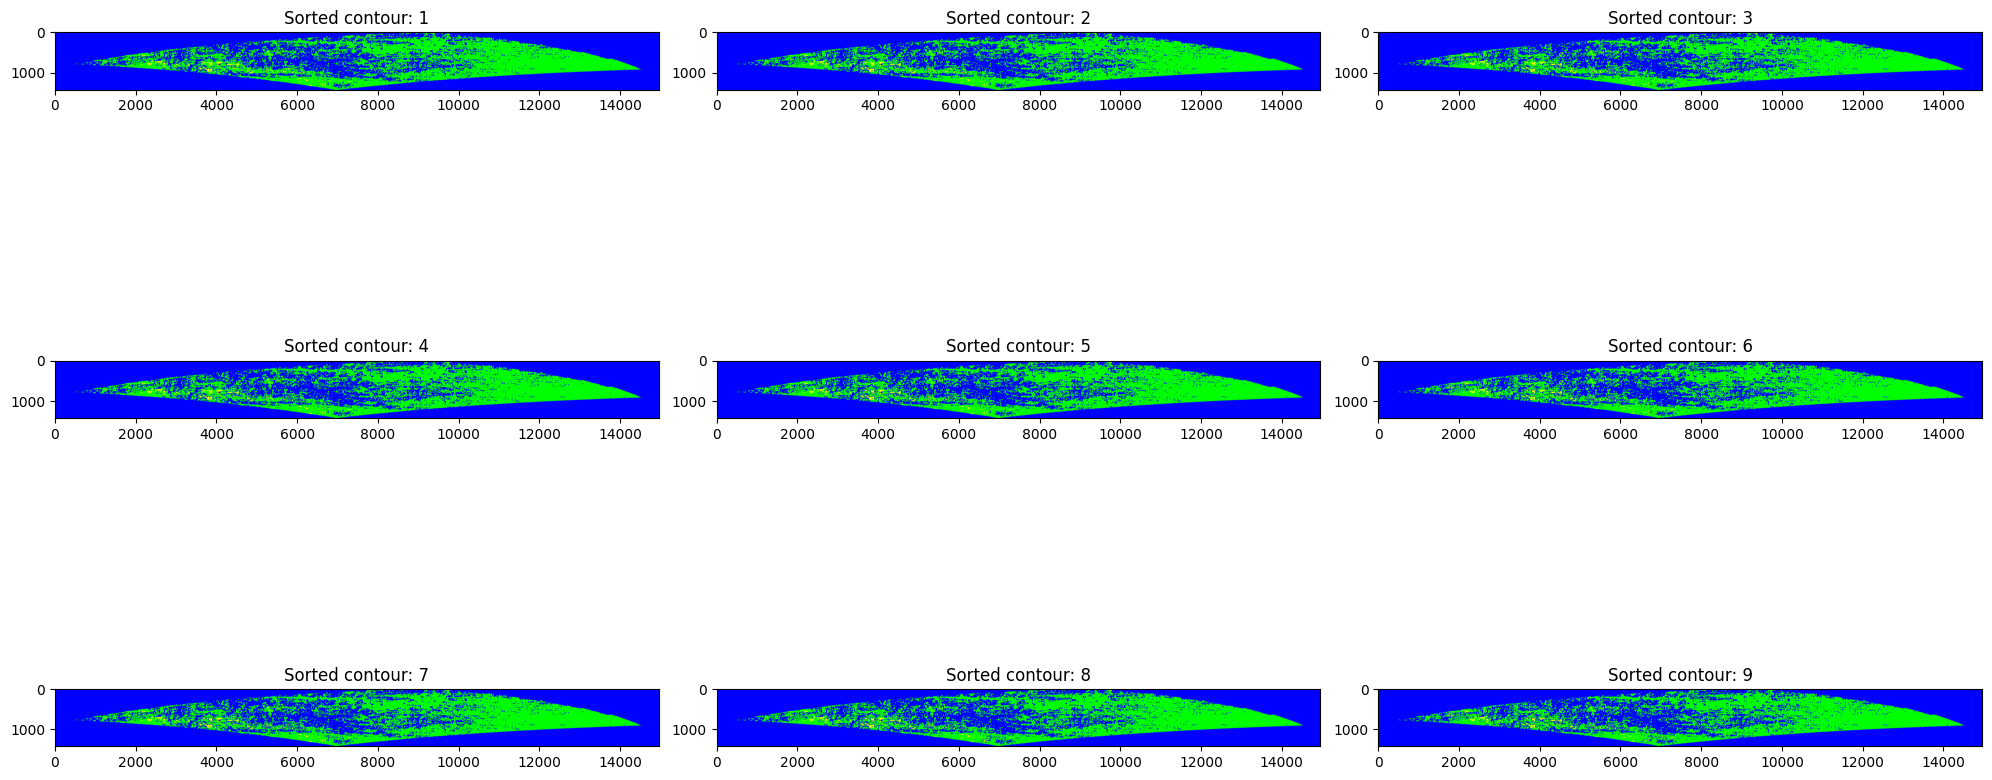

In [105]:
image = resulting_mask3
def get_contour_areas(contours):
    all_areas = []
    for cnt in contours:
        area = cv.contourArea(cnt) # cv2.contourArea(cnt) если был импорт import cv2
        all_areas.append(area)
    return all_areas
#print("Unsorted contours: ", *get_contour_areas(contours))
sorted_contours = sorted(contours, key=cv.contourArea, reverse=True)

print("Sorted contours: ", *get_contour_areas(sorted_contours))
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
fig.tight_layout()

count = 0
for k in range(len(sorted_contours)):
    for i in range(3):
        for j in range(3):
            if count <= 8:
                cv.drawContours(image, [sorted_contours[count]], -1, (255, 0, 0), 3)
                ax[i][j].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
                ax[i][j].set_title("Sorted contour: {}".format(count+1))
            count += 1


### Задание 6.7. Напишите функцию, которая получает на вход изображение и разделяет его на фрагменты (патчи), размером 256 на 256 пикселей. Функция должна вернуть массив из фрагментов.








Алгоритм обрезки изображения на равные патчи можно реализовать следующим образом:

1. Получить размеры изображения (ширина и высота).
2. Задать размеры патча (например, ширина и высота патча равная 256 пикселей).
3. Вычислить количество патчей по горизонтали и вертикали, разделив размеры изображения на размеры патча и округлив результаты.
4. Создать пустой массив, в котором будут храниться обрезанные патчи.
5. Проходя по всем патчам, вырезать каждый патч из исходного изображения, используя размеры патча и текущие координаты.
6. Добавить вырезанный патч в массив патчей.
7. Вернуть массив патчей как результат работы алгоритма.

> Пример:
>
> Задание удобно выполнить с помощью срезов.
>
> Поскольку все изображения имеют разный размер, нам необходимо обрезать исходное изображение до ближайшего размера, кратного 256,
>
> Исходная размерность: (1920, 1080, 3)
>
> X = 1920 // 256 = 7 (количество фрагментов по горизонтали)
>
> Y = 1080 // 256 = 4 (количество фрагментов по вертикали)
>
> X = 256 * 7 = 1792
>
> Y = 256 * 4 = 1024
>
> Размерность после обрезки: (1792, 1024, 3)
>
> После этого итеративно проходимся по изображению (можно двумя циклами - по вертикали и по горизонтали) и помещаем в массив обрезанные фрагменты.

**Разделите на патчи изображение:**

In [106]:
def split_image_into_patches(image):
    height, width, _ = image.shape
    patch_size = 256

    patches = []
    for y in range(0, height, patch_size):
        for x in range(0, width, patch_size):
            patch = image[y:y+patch_size, x:x+patch_size]
            a=patch.shape
            if (a[0] == patch_size) and (a[1] == patch_size):
              patches.append(patch)
    Y = patch_size * (height // patch_size)
    X = patch_size * (width // patch_size)
    cort = (X, Y, _)
    return np.array(patches, dtype=object), cort

image = cv2.imread("/content/111.jpg")
patches, cort = split_image_into_patches(image)
np.save("picture.npy", patches)

print("Размерность после обрезки:", cort)
#for i in patches:
#  cv2_imshow(i)

Размерность после обрезки: (512, 256, 3)


**Разделите на патчи сегментированную маску:**

In [110]:
import tifffile as tiff

image = tiff.imread('/content/task6.tif')
patches, color = split_image_into_patches(image)
np.save("mask.npy", patches)
np.array(patches, dtype=object)
print("Размерность после обрезки:", cort)
# for i in patches:
#   cv2_imshow(i)

Размерность после обрезки: (512, 256, 3)


**После этого сохраните получившиеся массивы в файлы img.npy и mask.npy:**

[Документация Numpy](https://numpy.org/doc/stable/reference/generated/numpy.save.html)



Пример сохранения массива в файл:

In [111]:
import numpy as np

x = np.arange(10)
print(x)
np.save("outfile.npy", x)

[0 1 2 3 4 5 6 7 8 9]


Пример загрузки массива из файла:

In [112]:
import numpy as np

a = np.load("/content/outfile.npy")
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [113]:
import numpy as np

a = np.load("/content/picture.npy", allow_pickle=True)
print(a)

[[[[43 95 171]
   [42 94 170]
   [39 94 169]
   ...
   [73 120 194]
   [76 121 195]
   [78 123 197]]

  [[41 93 169]
   [41 93 169]
   [38 93 168]
   ...
   [74 121 195]
   [77 122 196]
   [78 123 197]]

  [[37 92 167]
   [37 92 167]
   [37 92 167]
   ...
   [73 120 194]
   [76 121 195]
   [77 122 196]]

  ...

  [[37 98 178]
   [37 98 178]
   [39 98 178]
   ...
   [105 125 130]
   [106 127 129]
   [107 128 130]]

  [[40 99 179]
   [40 99 179]
   [40 99 179]
   ...
   [106 126 131]
   [107 128 130]
   [108 129 130]]

  [[41 100 180]
   [41 100 180]
   [41 100 180]
   ...
   [109 128 133]
   [106 127 129]
   [104 125 126]]]


 [[[76 124 196]
   [75 123 195]
   [72 121 191]
   ...
   [41 93 176]
   [37 91 174]
   [35 89 172]]

  [[75 123 195]
   [73 121 193]
   [72 121 191]
   ...
   [40 92 175]
   [36 90 173]
   [34 88 171]]

  [[72 120 192]
   [72 120 192]
   [71 120 190]
   ...
   [37 91 174]
   [34 88 171]
   [32 86 169]]

  ...

  [[108 128 129]
   [105 125 126]
   [101 119 118]
   

## Задание 7. Аугментация данных

Аугментация данных — это процесс дополнения датасета сходными данными, созданными из уже имеющихся. Аугментация повсеместно применяется при работе с изображениями и часто включает в себя поворот, смещение, замутнение и другие модификации существую-щих изображений, что позволяет нейросети выделять их наиболее важные признаки.

Пример:

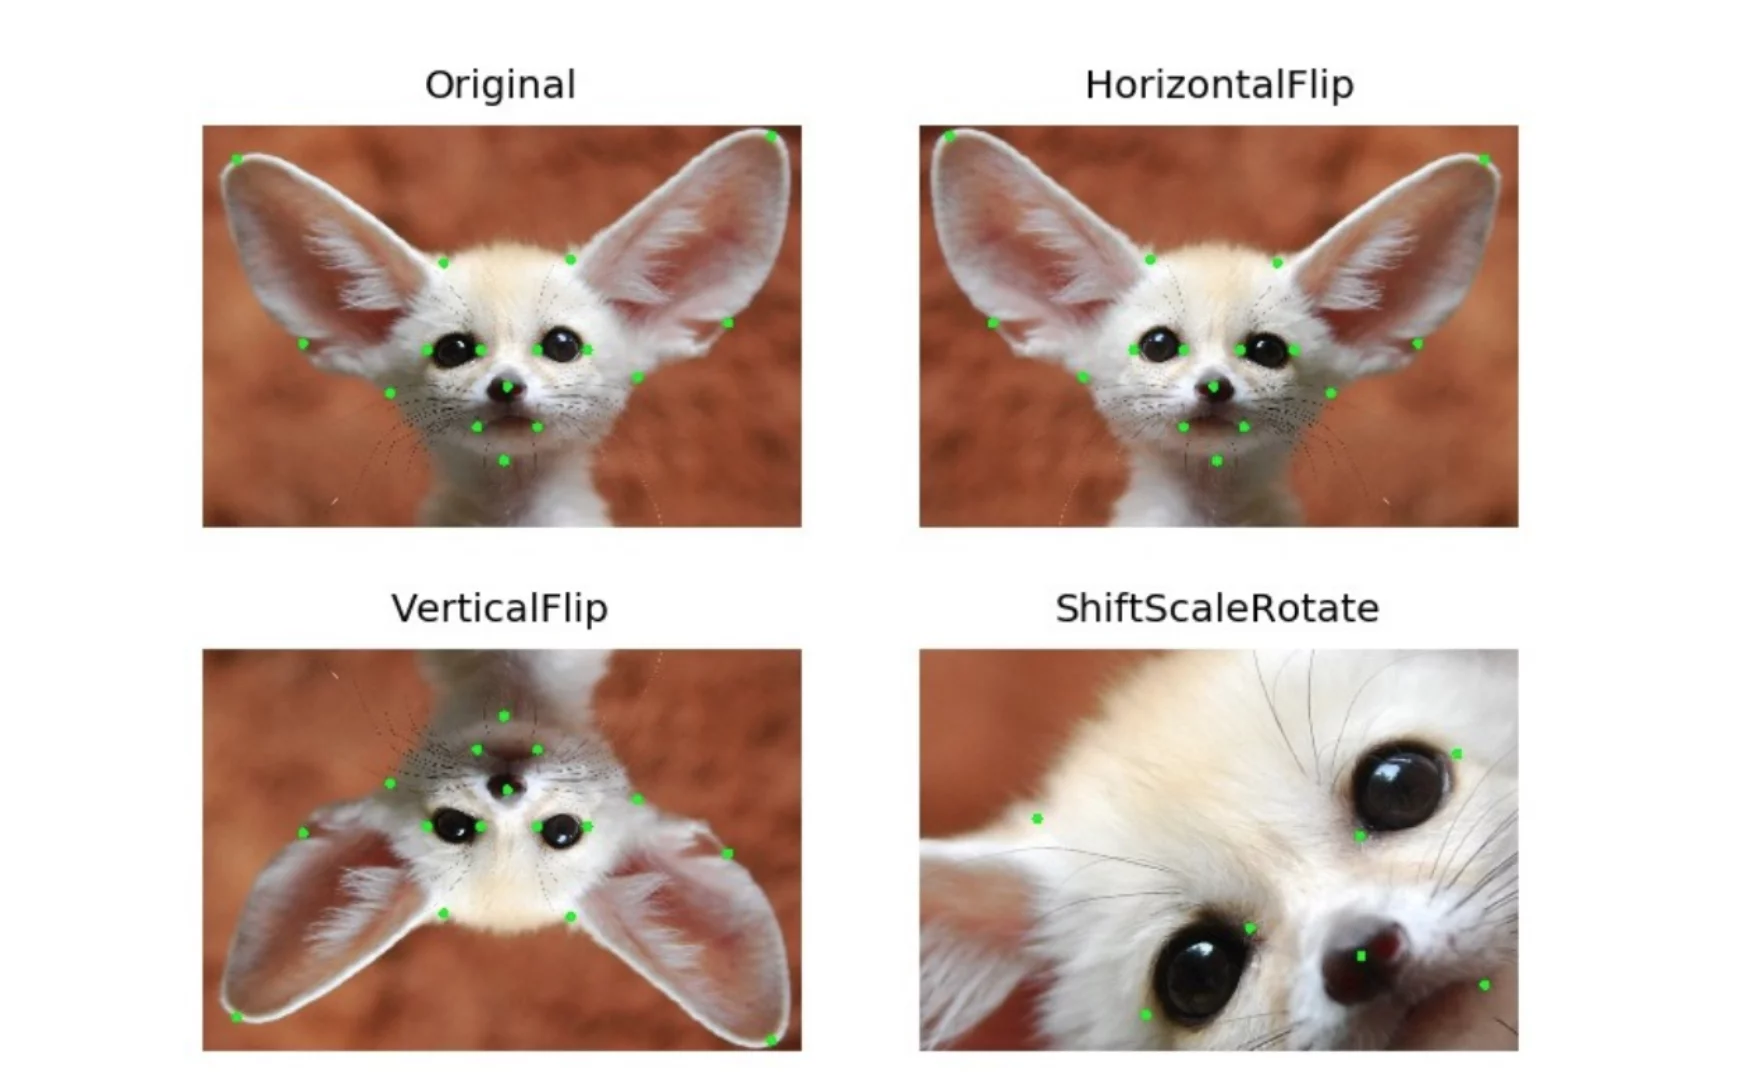

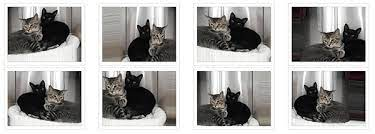

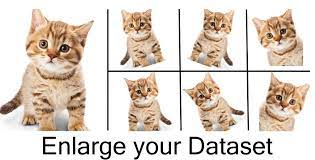

**Используя различные методы преобразования и трансформирования изображений, реализуйте функцию для аугментации данных.**

> Функция получает на вход массив изображений и количество преобразований (n) каждого изображения.
>
> Затем к каждому изображению n раз применяются случайные методы (отражения, афинные преобразования, и т.д.)
>
> В результате функция возвращает массив аугментированных изображений, число элементов в котором в n раз больше, чем было в исходном.

ссылка на картину 1: /content/111.jpg
количество преобразований 1 изображения: 8
ссылка на картину 2: /content/222.jpg
количество преобразований 2 изображения: 8


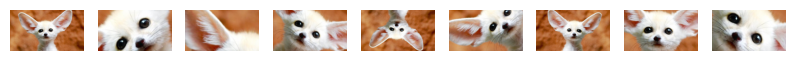

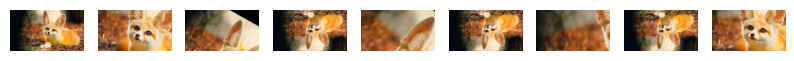

In [2]:
import cv2
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt

pictures = []
Y = []

def augmentation(x):
  for i in range(x):
    pic = input(f'ссылка на картину {i+1}: ')
    y = input(f'количество преобразований {i+1} изображения: ')
    pictures.append(pic)
    Y.append(y)
  for i in range(x):
    fig, axs = plt.subplots(1, int(Y[i])+1, figsize=(10, 4))
    img = Image.open(pictures[i])
    image = cv2.imread(pictures[i])
    h, w, _ = image.shape
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0].axis('off')
    for k in range(1, int(Y[i]) + 1):
      random_number = random.randint(-2, 3)
      if (random_number <= 1):
        ugol = random.randint(-45, 45)
        shift = random.randint(2, 3)
        rotation = random.randint(2, 4)
        rotation_matrix = cv2.getRotationMatrix2D((w/rotation ,h/rotation), ugol, shift)
        rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
        axs[k].imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
        axs[k].axis('off')

      elif (random_number == 2):
        vertical = cv2.flip(image, 0)
        axs[k].imshow(cv2.cvtColor(vertical, cv2.COLOR_BGR2RGB))
        axs[k].axis('off')

      elif (random_number == 3):
        horizontal = cv2.flip(image, 1)
        axs[k].imshow(cv2.cvtColor(horizontal, cv2.COLOR_BGR2RGB))
        axs[k].axis('off')
    plt.show()

augmentation(2)